# Naive Bayes Classification Examples

+ Using the famous Iris dataset  
![iris varieties](iris-dataset-varieties.png)

## Bayesian Ridge Regression

### Packages

In [15]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# modeling packages
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

### Display Settings

In [16]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

sn.set_style('darkgrid')
sn.set_context('notebook', font_scale=1.5)

### Data Loading and Exploration

In [17]:
# load the iris dataset from sklearn; note sklearn does not use pandas dataframes
iris = load_iris()
# anatomy of the data object
print("feature_names: {}".format(iris.feature_names))
print("feature_shape: {}".format(iris.data.shape))
print("target_names: {}".format(iris.target_names))
print("target_shape: {}".format(iris.target.shape))
#print(iris.DESCR)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature_shape: (150, 4)
target_names: ['setosa' 'versicolor' 'virginica']
target_shape: (150,)


In [18]:
# create a dataframe to summarize and visualize
iris_df = pd.DataFrame(index=iris.target, data=iris.data, columns=iris.feature_names)
iris_df.rename(index={0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)
iris_df.index.names=['species']
iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df.reset_index(level=0, inplace=True)
display(iris_df.head())
display(iris_df.tail())
iris_df.iloc[:, 0:3].groupby('species').describe()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


,species,sepal_length,sepal_width,petal_length,petal_width
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3
149,virginica,5.9,3.0,5.1,1.8


sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width                                                
                 count   mean       std  min    25%  50%    75%  max  
species                                                               
setosa            50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4  
versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8

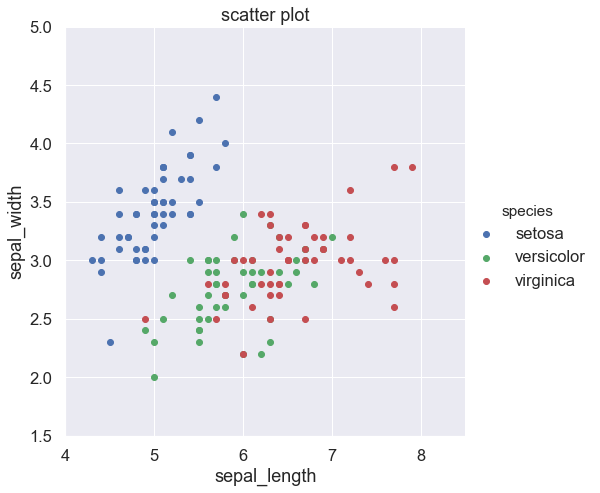

In [19]:
#scatter plot of sepal length vs sepal width
sn.FacetGrid(iris_df, hue='species', height=7).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.xlim(4.0, 8.5)
plt.ylim(1.5, 5.0)
plt.title('scatter plot');

### GNB Fit and Decision Boundaries

We fit a Gaussian Naive Bayesian classifier using only two attributes

In [20]:
gnb = GaussianNB(priors=None)
gnb.fit(iris.data[:,0:2], iris.target)

y_pred = gnb.predict(iris.data[:,0:2])
n_fail = (iris.target != y_pred).sum()
print("Total points: {0}; Mislabeled points: {1}".format(iris.data.shape[0], n_fail))

Total points: 150; Mislabeled points: 33


In [21]:
# first create a 2D grid of npts x npts points for sepal_length and sepal_width
# the numpy function meshgrid returns the coordinates
npts = 100
X, Y = np.meshgrid(np.linspace(4.0, 8.5, npts), np.linspace(1.5, 5, npts))
# then we compute the model predictions for each point on the grid
Z = np.array([gnb.predict([[x, y]])[0] for x, y in zip(np.ravel(X), np.ravel(Y))])
# we reshape the prediction array to be npts x npts
Z = Z.reshape(X.shape)

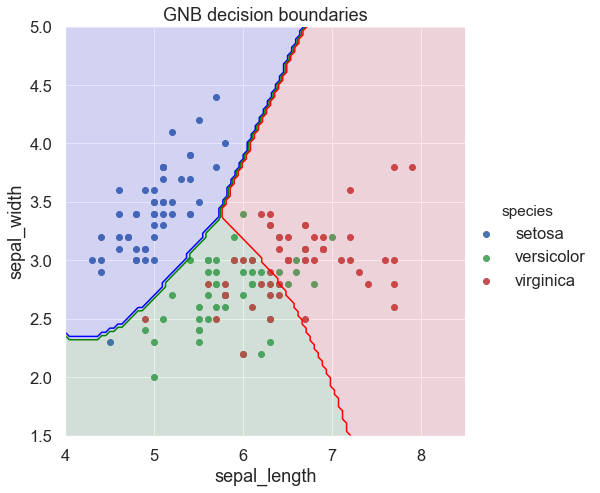

In [22]:
# we plot a filled contour and a boundary contour
g = sn.FacetGrid(iris_df, hue='species', height=7).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
g.ax.contourf(X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
g.ax.contour(X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
g.ax.set_xlabel('sepal_length')
g.ax.set_ylabel('sepal_width')
g.ax.set_title('GNB decision boundaries');

### GNB Fit with all Four Attributes

In [23]:
gnb1 = GaussianNB(priors=None)
gnb1.fit(iris.data, iris.target)

y1_pred = gnb1.predict(iris.data)
n1_fail = (iris.target != y1_pred).sum()
print("Total points: {0}; Mislabeled points: {1}".format(iris.data.shape[0], n1_fail))

Total points: 150; Mislabeled points: 6
